In [1]:
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image

# Reading the Data

### Reading the labels (coordinates of object bounding box)

In [2]:
data = pd.read_csv(r'coco_minitrain2017.csv', header=None)
data

0       1       2       3       4             5  6
0       000000131075.jpg   20.23   55.98  313.49  326.50            tv  0
1       000000131075.jpg  176.90  381.12  286.20  136.63        laptop  0
2       000000131075.jpg  369.96  361.35   72.76   73.91        laptop  0
3       000000131075.jpg  411.68  417.87   66.32  129.44         chair  0
4       000000131075.jpg  367.31  363.25   72.27   67.01            tv  0
...                  ...     ...     ...     ...     ...           ... ..
183541  000000262103.jpg    2.45    0.91   94.03  181.51           car  0
183542  000000393195.jpg    6.10  214.53  331.31  262.83          boat  0
183543  000000393195.jpg   46.37    3.34  593.63  478.66        person  0
183544  000000393195.jpg  419.40    0.88  217.84  309.23        person  0
183545  000000131067.jpg    4.21    1.17  628.93  421.75  fire hydrant  0

[183546 rows x 7 columns]

In [3]:
data.columns = ['image','c1','c2','c3','c4','label','annot']
data

image      c1      c2      c3      c4         label  annot
0       000000131075.jpg   20.23   55.98  313.49  326.50            tv      0
1       000000131075.jpg  176.90  381.12  286.20  136.63        laptop      0
2       000000131075.jpg  369.96  361.35   72.76   73.91        laptop      0
3       000000131075.jpg  411.68  417.87   66.32  129.44         chair      0
4       000000131075.jpg  367.31  363.25   72.27   67.01            tv      0
...                  ...     ...     ...     ...     ...           ...    ...
183541  000000262103.jpg    2.45    0.91   94.03  181.51           car      0
183542  000000393195.jpg    6.10  214.53  331.31  262.83          boat      0
183543  000000393195.jpg   46.37    3.34  593.63  478.66        person      0
183544  000000393195.jpg  419.40    0.88  217.84  309.23        person      0
183545  000000131067.jpg    4.21    1.17  628.93  421.75  fire hydrant      0

[183546 rows x 7 columns]

In [4]:
df = data.drop_duplicates('image', keep='first')

In [5]:
df

image      c1      c2      c3      c4         label  annot
0       000000131075.jpg   20.23   55.98  313.49  326.50            tv      0
5       000000393223.jpg  289.08  251.00  128.51  210.94    toothbrush      0
7       000000393228.jpg   84.63  201.48  196.19  122.14      elephant      0
10      000000131087.jpg  151.81  251.56   79.83   30.85           dog      0
12      000000131089.jpg  150.57  109.27  141.91  317.73        person      0
...                  ...     ...     ...     ...     ...           ...    ...
183510  000000262093.jpg   39.41  176.23   50.53   84.44         knife      0
183536  000000262101.jpg  325.48  316.71   59.36  104.34           tie      0
183540  000000262103.jpg   87.39   72.94  326.57  290.54           dog      0
183542  000000393195.jpg    6.10  214.53  331.31  262.83          boat      0
183545  000000131067.jpg    4.21    1.17  628.93  421.75  fire hydrant      0

[25000 rows x 7 columns]

### Reading the Images

In [6]:
import os
img = []
for file in os.listdir('Data/train2017'):
    img.append(file)

In [7]:
df = df[df['image'].isin(img)]
len(df)

5001

In [8]:
df = df.reset_index()

In [9]:
images_data_path = "Data/train2017/"
images_data_size = 5000  # We take a subsample of 5000 images from the dataset

In [10]:
images_data = list()
for idx in range(df.shape[0]):
    path = "{}/{}".format(str(images_data_path),str(df.iloc[idx].image))
    
    # Reading images using PIL library
    image = PIL.Image.open(path).resize((224,224)) # reshape to match required resolution of mobilenet
    
    image_array = np.asarray(image) / 255 #normlaization of pixels

    images_data.append(image_array)


In [11]:
len(images_data)

5001

In [12]:
ind = []  # indices of messy images to be dropped
for i in range(len(images_data)):
    if images_data[i].shape!=(224,224,3):
         ind.append(i)
ind

[48, 537, 658, 930, 1631, 2220, 4138, 4653]

In [13]:
# dropping messy images
im = []
for i in range(len(images_data)):
    print(images_data[i])
    if i not in ind:
         im.append(np.array(images_data[i]))

[[[0.09803922 0.05098039 0.07843137]
  [0.0745098  0.04313725 0.05490196]
  [0.04313725 0.01568627 0.02352941]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.09411765 0.0745098  0.09019608]
  [0.08627451 0.0627451  0.07843137]
  [0.0745098  0.03529412 0.05098039]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.10980392 0.0745098  0.07058824]
  [0.11764706 0.0745098  0.07843137]
  [0.1254902  0.0627451  0.06666667]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[0.69803922 0.61960784 0.37254902]
  [0.74901961 0.70196078 0.47843137]
  [0.72941176 0.64705882 0.41176471]
  ...
  [0.44313725 0.51764706 0.15294118]
  [0.38039216 0.43529412 0.10588235]
  [0.49019608 0.44705882 0.16470588]]

 [[0.69411765 0.61176471 0.32941176]
  [0.76078431 0.68235294 0.49411765]


[[[0.47058824 0.48627451 0.49019608]
  [0.49803922 0.50196078 0.50588235]
  [0.50196078 0.51372549 0.50980392]
  ...
  [0.44705882 0.46666667 0.46666667]
  [0.41176471 0.42352941 0.44313725]
  [0.42745098 0.44313725 0.4627451 ]]

 [[0.47843137 0.49019608 0.48627451]
  [0.48627451 0.49411765 0.50980392]
  [0.54117647 0.53333333 0.5372549 ]
  ...
  [0.48235294 0.49803922 0.50980392]
  [0.49019608 0.48627451 0.52156863]
  [0.49803922 0.52156863 0.55686275]]

 [[0.47843137 0.49411765 0.49411765]
  [0.49019608 0.49411765 0.49803922]
  [0.53333333 0.5372549  0.5372549 ]
  ...
  [0.6        0.62745098 0.65882353]
  [0.51372549 0.52941176 0.55686275]
  [0.5372549  0.55686275 0.59215686]]

 ...

 [[0.8        0.81568627 0.87843137]
  [0.80392157 0.83137255 0.88627451]
  [0.81568627 0.84705882 0.88627451]
  ...
  [0.58431373 0.56862745 0.50588235]
  [0.57647059 0.56470588 0.5254902 ]
  [0.60392157 0.58039216 0.52156863]]

 [[0.80392157 0.81960784 0.8745098 ]
  [0.80392157 0.82352941 0.88235294]


[[[0.50588235 0.50588235 0.29019608]
  [0.47843137 0.47843137 0.26666667]
  [0.50588235 0.5254902  0.26666667]
  ...
  [0.54117647 0.51372549 0.21568627]
  [0.53333333 0.5254902  0.29019608]
  [0.52156863 0.51764706 0.32156863]]

 [[0.50588235 0.53333333 0.30980392]
  [0.45882353 0.49411765 0.24313725]
  [0.52941176 0.54901961 0.27843137]
  ...
  [0.5372549  0.5254902  0.22745098]
  [0.54509804 0.50980392 0.28235294]
  [0.51372549 0.49019608 0.28235294]]

 [[0.52941176 0.52941176 0.30980392]
  [0.49411765 0.50588235 0.27843137]
  [0.52941176 0.52156863 0.2627451 ]
  ...
  [0.49411765 0.50196078 0.23529412]
  [0.50588235 0.47843137 0.25490196]
  [0.51764706 0.49411765 0.26666667]]

 ...

 [[0.59215686 0.58039216 0.3372549 ]
  [0.56862745 0.56470588 0.30980392]
  [0.55686275 0.55294118 0.2745098 ]
  ...
  [0.54901961 0.54509804 0.29803922]
  [0.55294118 0.54509804 0.32156863]
  [0.55686275 0.54509804 0.33333333]]

 [[0.56862745 0.57254902 0.31764706]
  [0.55294118 0.56470588 0.29803922]


[[[0.77647059 0.75294118 0.70980392]
  [0.77647059 0.75294118 0.70980392]
  [0.77254902 0.74901961 0.70588235]
  ...
  [0.52941176 0.49411765 0.42745098]
  [0.51372549 0.47843137 0.40392157]
  [0.51764706 0.4627451  0.39607843]]

 [[0.76470588 0.74509804 0.70196078]
  [0.76862745 0.74901961 0.70588235]
  [0.77254902 0.75294118 0.70980392]
  ...
  [0.54117647 0.49411765 0.42745098]
  [0.5254902  0.48235294 0.41176471]
  [0.50980392 0.45882353 0.4       ]]

 [[0.72941176 0.70588235 0.6627451 ]
  [0.76470588 0.74117647 0.70588235]
  [0.77647059 0.75686275 0.70980392]
  ...
  [0.51764706 0.50196078 0.43137255]
  [0.50980392 0.48235294 0.41176471]
  [0.51372549 0.47058824 0.4       ]]

 ...

 [[0.52941176 0.53333333 0.61176471]
  [0.50980392 0.52941176 0.61176471]
  [0.53333333 0.5372549  0.61176471]
  ...
  [0.88235294 0.91372549 0.95294118]
  [0.89019608 0.92156863 0.95686275]
  [0.90588235 0.92156863 0.94901961]]

 [[0.50588235 0.51372549 0.58823529]
  [0.5372549  0.5372549  0.59215686]


[[[0.70196078 0.65490196 0.74509804]
  [0.74117647 0.71372549 0.83921569]
  [0.73333333 0.72156863 0.81960784]
  ...
  [0.37254902 0.33333333 0.22352941]
  [0.38039216 0.32156863 0.21960784]
  [0.4        0.32156863 0.22745098]]

 [[0.91764706 0.90588235 0.96470588]
  [0.94117647 0.93333333 0.97647059]
  [0.94901961 0.94509804 0.96862745]
  ...
  [0.35686275 0.31764706 0.21960784]
  [0.37254902 0.31764706 0.21960784]
  [0.38823529 0.32156863 0.22745098]]

 [[0.78823529 0.81960784 0.78039216]
  [0.81960784 0.84313725 0.78431373]
  [0.78823529 0.81568627 0.74117647]
  ...
  [0.36078431 0.31764706 0.22745098]
  [0.36078431 0.31372549 0.21960784]
  [0.36862745 0.31764706 0.22745098]]

 ...

 [[0.12156863 0.12156863 0.12156863]
  [0.12156863 0.12156863 0.12156863]
  [0.1254902  0.12156863 0.12156863]
  ...
  [0.10980392 0.10196078 0.10588235]
  [0.11372549 0.10588235 0.10980392]
  [0.10980392 0.10196078 0.10588235]]

 [[0.11764706 0.11764706 0.11764706]
  [0.12156863 0.12156863 0.1254902 ]


[[[0.25882353 0.24705882 0.16078431]
  [0.27058824 0.25882353 0.17647059]
  [0.26666667 0.25490196 0.18823529]
  ...
  [0.71372549 0.78823529 0.80784314]
  [0.74901961 0.81960784 0.84313725]
  [0.70196078 0.76470588 0.79215686]]

 [[0.29411765 0.29019608 0.20392157]
  [0.29411765 0.28627451 0.20784314]
  [0.29019608 0.28235294 0.20784314]
  ...
  [0.69803922 0.77254902 0.79215686]
  [0.7254902  0.79607843 0.82352941]
  [0.71372549 0.78039216 0.80784314]]

 [[0.29411765 0.29019608 0.21176471]
  [0.29019608 0.28627451 0.20784314]
  [0.29411765 0.29019608 0.20784314]
  ...
  [0.71372549 0.78823529 0.80392157]
  [0.74117647 0.80784314 0.83529412]
  [0.73333333 0.8        0.82745098]]

 ...

 [[0.57254902 0.34509804 0.11372549]
  [0.56862745 0.3372549  0.09411765]
  [0.58039216 0.34117647 0.08235294]
  ...
  [0.27843137 0.30196078 0.2627451 ]
  [0.49411765 0.48235294 0.42352941]
  [0.4745098  0.43529412 0.37254902]]

 [[0.54509804 0.34117647 0.11764706]
  [0.54901961 0.3372549  0.11372549]


[[[0.72156863 0.41176471 0.12156863]
  [0.72156863 0.41176471 0.12156863]
  [0.71372549 0.41176471 0.12156863]
  ...
  [0.38039216 0.24313725 0.1254902 ]
  [0.38039216 0.24313725 0.1254902 ]
  [0.37647059 0.23921569 0.11764706]]

 [[0.71372549 0.40784314 0.1254902 ]
  [0.71764706 0.41176471 0.12941176]
  [0.71372549 0.41176471 0.12941176]
  ...
  [0.37647059 0.23921569 0.12156863]
  [0.37647059 0.23921569 0.12156863]
  [0.36862745 0.23921569 0.11764706]]

 [[0.70588235 0.40392157 0.12156863]
  [0.70588235 0.4        0.1254902 ]
  [0.70588235 0.4        0.13333333]
  ...
  [0.36862745 0.23921569 0.11764706]
  [0.36862745 0.23921569 0.12156863]
  [0.36862745 0.23921569 0.1254902 ]]

 ...

 [[0.89803922 0.76470588 0.70980392]
  [0.80392157 0.6745098  0.62352941]
  [0.6745098  0.54117647 0.49019608]
  ...
  [0.90196078 0.83137255 0.79607843]
  [0.90588235 0.83529412 0.79607843]
  [0.91372549 0.83529412 0.80392157]]

 [[0.83921569 0.70196078 0.64313725]
  [0.72941176 0.58823529 0.54117647]


[[[0.00392157 0.         0.00784314]
  [0.01568627 0.00784314 0.00392157]
  [0.01960784 0.01568627 0.00784314]
  ...
  [0.50588235 0.50980392 0.49411765]
  [0.49803922 0.49803922 0.47843137]
  [0.47058824 0.46666667 0.44705882]]

 [[0.00784314 0.         0.00784314]
  [0.01568627 0.01176471 0.00784314]
  [0.02352941 0.01960784 0.00784314]
  ...
  [0.50980392 0.51372549 0.49411765]
  [0.50196078 0.50196078 0.47843137]
  [0.4745098  0.47058824 0.45098039]]

 [[0.01176471 0.00392157 0.01176471]
  [0.01960784 0.01176471 0.00784314]
  [0.02745098 0.01960784 0.01176471]
  ...
  [0.51372549 0.50980392 0.49803922]
  [0.50196078 0.50196078 0.47843137]
  [0.4745098  0.47058824 0.45098039]]

 ...

 [[0.4627451  0.39215686 0.34901961]
  [0.4627451  0.39607843 0.34901961]
  [0.49803922 0.43137255 0.37647059]
  ...
  [0.38039216 0.30980392 0.21568627]
  [0.38431373 0.31372549 0.22352941]
  [0.4        0.32941176 0.24705882]]

 [[0.48235294 0.40784314 0.36470588]
  [0.4745098  0.40784314 0.36078431]


[[[0.27843137 0.32156863 0.31372549]
  [0.2627451  0.33333333 0.25882353]
  [0.20392157 0.28235294 0.19607843]
  ...
  [0.34117647 0.35294118 0.21960784]
  [0.35686275 0.38039216 0.23529412]
  [0.28235294 0.30980392 0.18823529]]

 [[0.30588235 0.35294118 0.34117647]
  [0.09803922 0.14901961 0.12941176]
  [0.14117647 0.2        0.14901961]
  ...
  [0.37647059 0.41960784 0.25490196]
  [0.27058824 0.3254902  0.18039216]
  [0.24705882 0.29019608 0.18431373]]

 [[0.26666667 0.31764706 0.30980392]
  [0.05490196 0.08235294 0.09803922]
  [0.09019608 0.1254902  0.09803922]
  ...
  [0.39607843 0.43921569 0.26666667]
  [0.32156863 0.37647059 0.20784314]
  [0.36470588 0.39607843 0.23921569]]

 ...

 [[0.81176471 0.75294118 0.63529412]
  [0.85098039 0.77647059 0.65098039]
  [0.81568627 0.74117647 0.63137255]
  ...
  [0.93333333 0.88627451 0.77254902]
  [0.93333333 0.88627451 0.77647059]
  [0.92941176 0.88235294 0.76862745]]

 [[0.76470588 0.7254902  0.61176471]
  [0.58039216 0.52941176 0.41176471]


[[[0.1372549  0.13333333 0.11372549]
  [0.1254902  0.1254902  0.11764706]
  [0.13333333 0.12941176 0.13333333]
  ...
  [0.12941176 0.09411765 0.05882353]
  [0.12941176 0.09411765 0.04705882]
  [0.14117647 0.08235294 0.04313725]]

 [[0.14117647 0.12941176 0.10980392]
  [0.15294118 0.12941176 0.12156863]
  [0.14509804 0.14509804 0.1254902 ]
  ...
  [0.1254902  0.09019608 0.0627451 ]
  [0.11764706 0.0745098  0.04705882]
  [0.12156863 0.06666667 0.03921569]]

 [[0.12941176 0.12941176 0.10588235]
  [0.15294118 0.12941176 0.11372549]
  [0.14117647 0.1372549  0.1254902 ]
  ...
  [0.14901961 0.12156863 0.0627451 ]
  [0.12941176 0.10588235 0.07843137]
  [0.11372549 0.08627451 0.0627451 ]]

 ...

 [[0.10980392 0.09411765 0.08235294]
  [0.11372549 0.09803922 0.0745098 ]
  [0.1254902  0.10196078 0.0627451 ]
  ...
  [0.41960784 0.37647059 0.27843137]
  [0.41176471 0.37254902 0.2627451 ]
  [0.38823529 0.36862745 0.24313725]]

 [[0.1254902  0.09803922 0.06666667]
  [0.11372549 0.09411765 0.0745098 ]


[[[0.4745098  0.5254902  0.49019608]
  [0.47843137 0.52941176 0.50196078]
  [0.47843137 0.52941176 0.50196078]
  ...
  [0.34117647 0.4        0.38823529]
  [0.34117647 0.39607843 0.38039216]
  [0.34509804 0.39607843 0.36862745]]

 [[0.48627451 0.5372549  0.50196078]
  [0.49019608 0.54117647 0.51372549]
  [0.49019608 0.54117647 0.51372549]
  ...
  [0.34509804 0.4        0.38431373]
  [0.35294118 0.40392157 0.38039216]
  [0.34509804 0.39607843 0.36470588]]

 [[0.48627451 0.5372549  0.50980392]
  [0.49019608 0.54117647 0.50980392]
  [0.49803922 0.54901961 0.51764706]
  ...
  [0.35294118 0.40392157 0.38039216]
  [0.35294118 0.40392157 0.37647059]
  [0.34901961 0.4        0.37254902]]

 ...

 [[0.82352941 0.89019608 0.93333333]
  [0.84313725 0.89411765 0.93333333]
  [0.84705882 0.88627451 0.9254902 ]
  ...
  [0.16470588 0.17647059 0.09411765]
  [0.16470588 0.17647059 0.10588235]
  [0.16470588 0.17647059 0.09803922]]

 [[0.83137255 0.88627451 0.93333333]
  [0.85098039 0.90196078 0.94117647]


[[[0.25098039 0.27058824 0.34901961]
  [0.25490196 0.2745098  0.35294118]
  [0.25490196 0.2745098  0.35686275]
  ...
  [0.32941176 0.34509804 0.39215686]
  [0.32156863 0.34117647 0.40392157]
  [0.3372549  0.34117647 0.40392157]]

 [[0.24705882 0.26666667 0.35686275]
  [0.25098039 0.26666667 0.36078431]
  [0.25490196 0.27058824 0.36470588]
  ...
  [0.3254902  0.3372549  0.38823529]
  [0.3254902  0.34117647 0.40784314]
  [0.3372549  0.34117647 0.40784314]]

 [[0.25490196 0.27058824 0.36862745]
  [0.25490196 0.27058824 0.36470588]
  [0.25490196 0.27058824 0.36470588]
  ...
  [0.32941176 0.34117647 0.39607843]
  [0.33333333 0.34509804 0.41960784]
  [0.3372549  0.34117647 0.41176471]]

 ...

 [[0.35686275 0.36078431 0.36470588]
  [0.37254902 0.37647059 0.39607843]
  [0.37647059 0.37647059 0.4       ]
  ...
  [0.31764706 0.28235294 0.21960784]
  [0.30980392 0.26666667 0.25882353]
  [0.2745098  0.25098039 0.23529412]]

 [[0.36862745 0.37254902 0.39607843]
  [0.37254902 0.37254902 0.40784314]


[[[0.43529412 0.39215686 0.40392157]
  [0.42745098 0.40784314 0.40784314]
  [0.41568627 0.41568627 0.41568627]
  ...
  [0.23137255 0.18823529 0.18039216]
  [0.22352941 0.18823529 0.16470588]
  [0.21176471 0.17254902 0.16470588]]

 [[0.44705882 0.4        0.40392157]
  [0.43921569 0.41568627 0.41568627]
  [0.43137255 0.42745098 0.43529412]
  ...
  [0.23137255 0.18823529 0.18039216]
  [0.22745098 0.18823529 0.18039216]
  [0.22352941 0.18431373 0.16862745]]

 [[0.45490196 0.40392157 0.41568627]
  [0.44705882 0.42745098 0.42745098]
  [0.43529412 0.43529412 0.43529412]
  ...
  [0.23137255 0.2        0.18431373]
  [0.23921569 0.18431373 0.18039216]
  [0.23529412 0.18431373 0.17254902]]

 ...

 [[0.35686275 0.22352941 0.14901961]
  [0.37647059 0.21176471 0.14901961]
  [0.38823529 0.21960784 0.1372549 ]
  ...
  [0.04705882 0.03137255 0.02745098]
  [0.05098039 0.03529412 0.03137255]
  [0.04705882 0.03529412 0.03137255]]

 [[0.35294118 0.21176471 0.1372549 ]
  [0.35294118 0.22352941 0.14117647]


[[[0.8        0.7254902  0.68235294]
  [0.81176471 0.74117647 0.68235294]
  [0.81568627 0.73333333 0.67843137]
  ...
  [0.3372549  0.4        0.4745098 ]
  [0.32941176 0.36470588 0.43529412]
  [0.24705882 0.31764706 0.35686275]]

 [[0.80392157 0.72941176 0.68627451]
  [0.78039216 0.70588235 0.65098039]
  [0.80392157 0.72156863 0.6745098 ]
  ...
  [0.33333333 0.38823529 0.4627451 ]
  [0.34117647 0.39607843 0.4627451 ]
  [0.30980392 0.37647059 0.45098039]]

 [[0.80784314 0.73333333 0.68235294]
  [0.8        0.7254902  0.6745098 ]
  [0.78039216 0.69803922 0.65490196]
  ...
  [0.29411765 0.36862745 0.45098039]
  [0.3254902  0.39607843 0.47058824]
  [0.30588235 0.37647059 0.45490196]]

 ...

 [[0.71372549 0.53333333 0.39607843]
  [0.7372549  0.55686275 0.42352941]
  [0.74901961 0.57254902 0.42352941]
  ...
  [0.38039216 0.35294118 0.17254902]
  [0.34117647 0.40784314 0.17254902]
  [0.41960784 0.41960784 0.26666667]]

 [[0.70196078 0.51764706 0.4       ]
  [0.7372549  0.56078431 0.43137255]


[[[0.98431373 1.         1.        ]
  [0.98431373 1.         1.        ]
  [0.98431373 1.         1.        ]
  ...
  [0.98039216 0.99607843 0.99215686]
  [0.98039216 0.99607843 0.99215686]
  [0.98431373 0.99607843 0.99607843]]

 [[0.98431373 1.         1.        ]
  [0.98431373 1.         1.        ]
  [0.98431373 1.         1.        ]
  ...
  [0.98039216 0.99607843 0.99215686]
  [0.98431373 0.99607843 0.99607843]
  [0.98431373 0.99607843 0.99215686]]

 [[0.98431373 1.         1.        ]
  [0.98431373 1.         1.        ]
  [0.98431373 1.         1.        ]
  ...
  [0.96078431 0.95686275 0.98431373]
  [0.95686275 0.96470588 0.97647059]
  [0.97254902 0.98431373 0.98823529]]

 ...

 [[0.59215686 0.20784314 0.04705882]
  [0.63137255 0.21568627 0.03137255]
  [0.64313725 0.23921569 0.04313725]
  ...
  [0.05882353 0.03921569 0.0627451 ]
  [0.0627451  0.04313725 0.06666667]
  [0.05490196 0.03529412 0.0627451 ]]

 [[0.58823529 0.2        0.03921569]
  [0.62745098 0.22352941 0.03921569]


[[[0.81960784 0.9254902  0.95294118]
  [0.84705882 0.9372549  0.97254902]
  [0.84313725 0.9372549  0.97254902]
  ...
  [0.10980392 0.10980392 0.12156863]
  [0.07058824 0.0627451  0.0745098 ]
  [0.2        0.17647059 0.17254902]]

 [[0.78431373 0.89803922 0.94509804]
  [0.81176471 0.92156863 0.95686275]
  [0.81960784 0.92941176 0.96078431]
  ...
  [0.11372549 0.10980392 0.10980392]
  [0.21568627 0.2        0.16862745]
  [0.21960784 0.2        0.18823529]]

 [[0.76862745 0.87843137 0.92941176]
  [0.78823529 0.89803922 0.94117647]
  [0.80392157 0.90980392 0.95686275]
  ...
  [0.23137255 0.20392157 0.16078431]
  [0.16862745 0.14901961 0.14117647]
  [0.10980392 0.11764706 0.10980392]]

 ...

 [[0.64313725 0.62745098 0.54509804]
  [0.65882353 0.63921569 0.55294118]
  [0.66666667 0.64705882 0.54117647]
  ...
  [0.48627451 0.49019608 0.45882353]
  [0.48235294 0.49019608 0.47843137]
  [0.30588235 0.31764706 0.28235294]]

 [[0.65490196 0.63529412 0.53333333]
  [0.6627451  0.63921569 0.54117647]


[[[0.0745098  0.04705882 0.05098039]
  [0.07843137 0.0745098  0.05098039]
  [0.07058824 0.07843137 0.02352941]
  ...
  [0.19607843 0.23137255 0.11764706]
  [0.22745098 0.25882353 0.14117647]
  [0.20784314 0.22745098 0.11372549]]

 [[0.09019608 0.06666667 0.07843137]
  [0.07843137 0.08627451 0.05490196]
  [0.04705882 0.05098039 0.01960784]
  ...
  [0.21176471 0.24705882 0.1254902 ]
  [0.18431373 0.22745098 0.11372549]
  [0.19215686 0.23529412 0.12156863]]

 [[0.07058824 0.04313725 0.03921569]
  [0.08627451 0.07843137 0.07058824]
  [0.07058824 0.08235294 0.02745098]
  ...
  [0.1372549  0.16470588 0.09019608]
  [0.14509804 0.17647059 0.10980392]
  [0.14901961 0.18431373 0.1372549 ]]

 ...

 [[0.0745098  0.01568627 0.02745098]
  [0.07058824 0.01176471 0.02352941]
  [0.07843137 0.01960784 0.03137255]
  ...
  [0.36470588 0.2627451  0.27058824]
  [0.34509804 0.23921569 0.25490196]
  [0.34509804 0.22745098 0.24313725]]

 [[0.07058824 0.01176471 0.02352941]
  [0.06666667 0.00784314 0.01960784]


[[[0.49411765 0.56078431 0.35294118]
  [0.51764706 0.58039216 0.37647059]
  [0.5372549  0.59607843 0.39215686]
  ...
  [0.50980392 0.54117647 0.38039216]
  [0.47058824 0.50588235 0.32941176]
  [0.49803922 0.52941176 0.3254902 ]]

 [[0.50588235 0.57647059 0.36078431]
  [0.52156863 0.58431373 0.36862745]
  [0.55294118 0.6        0.39215686]
  ...
  [0.55294118 0.58431373 0.43529412]
  [0.55294118 0.58431373 0.41568627]
  [0.52941176 0.56078431 0.38823529]]

 [[0.47058824 0.54117647 0.32941176]
  [0.48235294 0.53333333 0.32941176]
  [0.53333333 0.57647059 0.36078431]
  ...
  [0.5372549  0.57647059 0.37647059]
  [0.5372549  0.58039216 0.36862745]
  [0.52941176 0.56470588 0.36862745]]

 ...

 [[0.45098039 0.55686275 0.31372549]
  [0.46666667 0.56470588 0.33333333]
  [0.49803922 0.59215686 0.35294118]
  ...
  [0.41568627 0.4745098  0.25490196]
  [0.56862745 0.63529412 0.36078431]
  [0.55686275 0.61960784 0.36470588]]

 [[0.4627451  0.56078431 0.35686275]
  [0.45490196 0.56862745 0.3372549 ]


[[[0.07843137 0.12941176 0.16470588]
  [0.02745098 0.36078431 0.54509804]
  [0.03137255 0.46666667 0.70196078]
  ...
  [0.05490196 0.09019608 0.11372549]
  [0.0627451  0.09803922 0.10588235]
  [0.05490196 0.09411765 0.11372549]]

 [[0.06666667 0.12941176 0.16078431]
  [0.03529412 0.35686275 0.57647059]
  [0.03137255 0.45882353 0.67843137]
  ...
  [0.05490196 0.09019608 0.11764706]
  [0.05098039 0.08627451 0.10980392]
  [0.05098039 0.08627451 0.11372549]]

 [[0.08235294 0.12156863 0.13333333]
  [0.03529412 0.29803922 0.48235294]
  [0.01568627 0.46666667 0.70980392]
  ...
  [0.05490196 0.09019608 0.10980392]
  [0.05882353 0.09019608 0.11764706]
  [0.05490196 0.09019608 0.11372549]]

 ...

 [[0.12941176 0.41960784 0.60392157]
  [0.1254902  0.42352941 0.59607843]
  [0.1254902  0.42745098 0.59607843]
  ...
  [0.10196078 0.40784314 0.6       ]
  [0.10588235 0.39607843 0.59607843]
  [0.10980392 0.39215686 0.59607843]]

 [[0.11764706 0.41568627 0.61960784]
  [0.10980392 0.42352941 0.61176471]


[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
[[[0.22352941 0.34117647 0.15686275]
  [0.10588235 0.26666667 0.0627451 ]
  [0.07058824 0.23921569 0.0627451 ]
  ...
  [0.85098039 0.85098039 0.85098039]
  [0.84705882 0.84705882 0.84705882]
  [0.85098039 0.85098039 0.85098039]]

 [[0.15294118 0.27843137 0.12156863]
  [0.19607843 0.32156863 0.14117647]
  [0.15294118 0.2745098  0.10588235]
  ...
  [0.85098039 0.85098039 0.85098039]
  [0.85490196 0.85490196 0.85490196]
  [0.85098039 0.85098039 0.85098039]]

 [[0.35686275 0.42

[[[0.28235294 0.29019608 0.34509804]
  [0.39215686 0.4        0.49803922]
  [0.41568627 0.45882353 0.56862745]
  ...
  [0.41176471 0.4745098  0.57647059]
  [0.41568627 0.47843137 0.57647059]
  [0.41176471 0.4745098  0.57647059]]

 [[0.18431373 0.18823529 0.21176471]
  [0.3254902  0.35686275 0.42745098]
  [0.39607843 0.4745098  0.55686275]
  ...
  [0.42352941 0.48627451 0.58431373]
  [0.41960784 0.48235294 0.58039216]
  [0.41960784 0.48235294 0.58039216]]

 [[0.2745098  0.29803922 0.31764706]
  [0.34117647 0.36862745 0.43529412]
  [0.38039216 0.43137255 0.51372549]
  ...
  [0.42352941 0.49019608 0.58431373]
  [0.41960784 0.49019608 0.58431373]
  [0.41176471 0.48235294 0.57647059]]

 ...

 [[0.6745098  0.69803922 0.69803922]
  [0.6745098  0.69803922 0.69803922]
  [0.67843137 0.70196078 0.70196078]
  ...
  [0.71372549 0.71764706 0.7254902 ]
  [0.71764706 0.72941176 0.73333333]
  [0.7254902  0.7372549  0.72941176]]

 [[0.66666667 0.69019608 0.69019608]
  [0.6745098  0.69803922 0.69803922]


[[[0.60784314 0.62352941 0.50588235]
  [0.61176471 0.63921569 0.51764706]
  [0.63921569 0.65882353 0.52156863]
  ...
  [0.55686275 0.44705882 0.14901961]
  [0.54509804 0.44705882 0.14509804]
  [0.55294118 0.44705882 0.1372549 ]]

 [[0.60784314 0.63137255 0.51372549]
  [0.62352941 0.63921569 0.5254902 ]
  [0.64313725 0.66666667 0.52156863]
  ...
  [0.56078431 0.45490196 0.14117647]
  [0.55686275 0.45490196 0.15294118]
  [0.56078431 0.44705882 0.14117647]]

 [[0.61568627 0.63137255 0.50980392]
  [0.62745098 0.65098039 0.53333333]
  [0.65882353 0.6745098  0.5372549 ]
  ...
  [0.56078431 0.4627451  0.14509804]
  [0.56078431 0.4627451  0.14901961]
  [0.56470588 0.45882353 0.16078431]]

 ...

 [[0.21568627 0.18431373 0.13333333]
  [0.20784314 0.16862745 0.12941176]
  [0.20392157 0.15294118 0.11372549]
  ...
  [0.05490196 0.05490196 0.03529412]
  [0.05882353 0.0627451  0.05882353]
  [0.04705882 0.04705882 0.05098039]]

 [[0.21176471 0.18823529 0.13333333]
  [0.18823529 0.15294118 0.11764706]


[[[0.47843137 0.45882353 0.42352941]
  [0.49019608 0.46666667 0.42352941]
  [0.51372549 0.47058824 0.42352941]
  ...
  [0.21176471 0.20784314 0.17647059]
  [0.36470588 0.32941176 0.28627451]
  [0.3254902  0.29411765 0.25098039]]

 [[0.43529412 0.41960784 0.34901961]
  [0.41960784 0.40392157 0.34509804]
  [0.43137255 0.40784314 0.35686275]
  ...
  [0.25882353 0.25098039 0.2       ]
  [0.39215686 0.34901961 0.30588235]
  [0.34901961 0.29803922 0.25098039]]

 [[0.27058824 0.2627451  0.21176471]
  [0.2745098  0.2745098  0.21568627]
  [0.28235294 0.27843137 0.22745098]
  ...
  [0.30196078 0.2627451  0.21176471]
  [0.36470588 0.30588235 0.26666667]
  [0.34117647 0.29411765 0.24705882]]

 ...

 [[0.58431373 0.54901961 0.52941176]
  [0.59215686 0.55294118 0.54509804]
  [0.60784314 0.56470588 0.55294118]
  ...
  [0.25490196 0.25490196 0.30196078]
  [0.09411765 0.09803922 0.09411765]
  [0.23921569 0.21960784 0.18039216]]

 [[0.57254902 0.5372549  0.50588235]
  [0.58039216 0.53333333 0.52941176]


[[[0.2        0.24313725 0.23137255]
  [0.25098039 0.29411765 0.2745098 ]
  [0.30588235 0.35294118 0.31764706]
  ...
  [0.99215686 0.98039216 0.93333333]
  [0.98039216 0.97254902 0.92156863]
  [0.95686275 0.94901961 0.89411765]]

 [[0.22352941 0.26666667 0.24313725]
  [0.27058824 0.31372549 0.28627451]
  [0.3254902  0.37254902 0.33333333]
  ...
  [0.99215686 0.98431373 0.9372549 ]
  [0.98431373 0.97647059 0.9254902 ]
  [0.96470588 0.95686275 0.90196078]]

 [[0.24705882 0.29019608 0.26666667]
  [0.29411765 0.34117647 0.31372549]
  [0.34901961 0.39215686 0.35294118]
  ...
  [0.99215686 0.98431373 0.94117647]
  [0.98431373 0.97647059 0.9254902 ]
  [0.97254902 0.96470588 0.91372549]]

 ...

 [[0.10588235 0.09411765 0.03137255]
  [0.11372549 0.10196078 0.03529412]
  [0.12156863 0.10196078 0.03529412]
  ...
  [0.35686275 0.31372549 0.16862745]
  [0.36078431 0.31764706 0.16470588]
  [0.21176471 0.18039216 0.09411765]]

 [[0.09803922 0.08627451 0.03137255]
  [0.10196078 0.09019608 0.03137255]


[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.99607843 1.         0.96862745]
  [0.97254902 0.96862745 0.94901961]
  [0.74509804 0.68627451 0.65490196]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         0.96470588]
  [0.96470588 0.96862745 0.95294118]
  [0.7372549  0.68627451 0.65882353]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         0.96470588]
  [0.96470588 0.96862745 0.94901961]
  [0.7372549  0.68627451 0.65882353]]

 ...

 [[0.8745098  0.76470588 0.62745098]
  [0.87058824 0.77254902 0.65098039]
  [0.77647059 0.69019608 0.56470588]
  ...
  [0.73333333 0.65882353 0.60392157]
  [0.78431373 0.67843137 0.55294118]
  [0.67843137 0.59607843 0.54901961]]

 [[0.75686275 0.63137255 0.4627451 ]
  [0.78431373 0.65882353 0.51372549]


[[[0.00392157 0.00392157 0.00392157]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.05882353 0.08235294 0.09019608]
  [0.00392157 0.01568627 0.02745098]
  [0.00392157 0.         0.        ]]

 [[0.00392157 0.00392157 0.00392157]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.07843137 0.09803922 0.09803922]
  [0.01568627 0.01960784 0.02352941]
  [0.         0.         0.        ]]

 [[0.00392157 0.00392157 0.00392157]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.10196078 0.11764706 0.10980392]
  [0.02352941 0.03137255 0.02745098]
  [0.         0.         0.        ]]

 ...

 [[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  ...
  [0.01176471 0.00784314 0.02745098]
  [0.01176471 0.00784314 0.02745098]
  [0.00784314 0.00392157 0.02352941]]

 [[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]


[[[0.37647059 0.29019608 0.09019608]
  [0.38039216 0.29019608 0.07843137]
  [0.38823529 0.29803922 0.09411765]
  ...
  [0.03529412 0.10588235 0.04705882]
  [0.2627451  0.30588235 0.21176471]
  [0.36470588 0.38823529 0.25098039]]

 [[0.36862745 0.28235294 0.08235294]
  [0.39607843 0.30588235 0.10196078]
  [0.40784314 0.31764706 0.11372549]
  ...
  [0.05882353 0.10980392 0.06666667]
  [0.15686275 0.21176471 0.17254902]
  [0.18039216 0.20784314 0.09019608]]

 [[0.37254902 0.28627451 0.09411765]
  [0.38823529 0.29803922 0.09411765]
  [0.38431373 0.30196078 0.09411765]
  ...
  [0.17254902 0.20392157 0.21568627]
  [0.07843137 0.16470588 0.11764706]
  [0.14901961 0.19607843 0.07058824]]

 ...

 [[0.81568627 0.81960784 0.78823529]
  [0.81176471 0.81568627 0.78431373]
  [0.81176471 0.81568627 0.78039216]
  ...
  [0.88627451 0.8627451  0.78823529]
  [0.84705882 0.8        0.71764706]
  [0.82745098 0.77647059 0.69019608]]

 [[0.81960784 0.82352941 0.79215686]
  [0.82352941 0.82745098 0.79607843]


[[[0.48627451 0.25490196 0.1372549 ]
  [0.47058824 0.2627451  0.15686275]
  [0.47843137 0.2627451  0.15294118]
  ...
  [0.48235294 0.26666667 0.16078431]
  [0.47843137 0.25882353 0.14509804]
  [0.49411765 0.2627451  0.14509804]]

 [[0.45098039 0.2627451  0.17254902]
  [0.41960784 0.36078431 0.31764706]
  [0.36470588 0.29411765 0.24705882]
  ...
  [0.45098039 0.40784314 0.33333333]
  [0.41176471 0.36470588 0.29411765]
  [0.47058824 0.29411765 0.18039216]]

 [[0.43137255 0.25098039 0.15686275]
  [0.38039216 0.3372549  0.30588235]
  [0.36078431 0.29411765 0.25490196]
  ...
  [0.43529412 0.41568627 0.36078431]
  [0.48235294 0.4627451  0.41960784]
  [0.49019608 0.29803922 0.20392157]]

 ...

 [[0.51372549 0.30980392 0.14509804]
  [0.61960784 0.53333333 0.16078431]
  [0.55294118 0.47058824 0.07058824]
  ...
  [0.64705882 0.56470588 0.19215686]
  [0.54509804 0.51372549 0.10980392]
  [0.49803922 0.32156863 0.12156863]]

 [[0.47843137 0.28627451 0.13333333]
  [0.55294118 0.47058824 0.16078431]


[[[0.24705882 0.4        0.6627451 ]
  [0.25098039 0.40392157 0.66666667]
  [0.25490196 0.40784314 0.67058824]
  ...
  [0.62745098 0.6745098  0.77254902]
  [0.60784314 0.65882353 0.75686275]
  [0.58431373 0.63921569 0.74901961]]

 [[0.25098039 0.40392157 0.66666667]
  [0.25098039 0.40392157 0.66666667]
  [0.25490196 0.40784314 0.67058824]
  ...
  [0.62352941 0.67058824 0.76862745]
  [0.59215686 0.64705882 0.75294118]
  [0.56862745 0.62745098 0.74117647]]

 [[0.25098039 0.40392157 0.66666667]
  [0.25490196 0.40784314 0.67058824]
  [0.25882353 0.41176471 0.6745098 ]
  ...
  [0.61568627 0.65490196 0.76470588]
  [0.58431373 0.63921569 0.74901961]
  [0.56078431 0.61960784 0.7372549 ]]

 ...

 [[0.37647059 0.34901961 0.23137255]
  [0.30196078 0.27843137 0.15294118]
  [0.3372549  0.31372549 0.19215686]
  ...
  [0.35686275 0.32941176 0.21960784]
  [0.3372549  0.31764706 0.19215686]
  [0.35294118 0.33333333 0.19607843]]

 [[0.35294118 0.34901961 0.18039216]
  [0.36470588 0.34509804 0.19215686]


[[[0.95294118 0.98823529 0.99215686]
  [0.95294118 0.99215686 1.        ]
  [0.96862745 0.99607843 1.        ]
  ...
  [0.75294118 0.63137255 0.61176471]
  [0.76862745 0.70980392 0.70588235]
  [0.77254902 0.67058824 0.6627451 ]]

 [[0.95686275 1.         1.        ]
  [0.9372549  0.98823529 0.98823529]
  [0.88627451 0.95294118 0.96078431]
  ...
  [0.74901961 0.67843137 0.6745098 ]
  [0.74509804 0.66666667 0.65490196]
  [0.78431373 0.72156863 0.70980392]]

 [[0.8        0.89019608 0.90588235]
  [0.74901961 0.84313725 0.8627451 ]
  [0.74117647 0.81960784 0.85490196]
  ...
  [0.75294118 0.63137255 0.62352941]
  [0.75686275 0.65490196 0.64705882]
  [0.77254902 0.72156863 0.71372549]]

 ...

 [[0.29803922 0.61176471 0.28627451]
  [0.30588235 0.58431373 0.29411765]
  [0.26666667 0.60392157 0.28235294]
  ...
  [0.30588235 0.61176471 0.28627451]
  [0.30588235 0.61568627 0.28627451]
  [0.41960784 0.64705882 0.34509804]]

 [[0.27843137 0.61176471 0.29803922]
  [0.20392157 0.53333333 0.21176471]


[[[0.02745098 0.03529412 0.03137255]
  [0.03137255 0.03921569 0.03529412]
  [0.03529412 0.04313725 0.03921569]
  ...
  [0.02352941 0.04313725 0.02745098]
  [0.02745098 0.03529412 0.02352941]
  [0.03529412 0.03529412 0.03137255]]

 [[0.02745098 0.03529412 0.03137255]
  [0.03137255 0.03921569 0.03529412]
  [0.03529412 0.04313725 0.03921569]
  ...
  [0.04705882 0.05882353 0.04313725]
  [0.03921569 0.04705882 0.03529412]
  [0.01568627 0.01960784 0.01176471]]

 [[0.03529412 0.04313725 0.03921569]
  [0.03137255 0.03921569 0.03529412]
  [0.03529412 0.04313725 0.03921569]
  ...
  [0.03137255 0.03921569 0.02352941]
  [0.01568627 0.02352941 0.01568627]
  [0.01568627 0.02352941 0.01176471]]

 ...

 [[0.12156863 0.13333333 0.07843137]
  [0.12941176 0.14901961 0.07843137]
  [0.14901961 0.18823529 0.09019608]
  ...
  [0.50588235 0.49019608 0.18431373]
  [0.47058824 0.43137255 0.21176471]
  [0.64705882 0.56078431 0.24313725]]

 [[0.13333333 0.14901961 0.09019608]
  [0.11372549 0.12941176 0.09019608]


[[[0.44313725 0.46666667 0.48627451]
  [0.45882353 0.47843137 0.49803922]
  [0.44313725 0.4745098  0.47058824]
  ...
  [0.39215686 0.42352941 0.44313725]
  [0.36862745 0.40784314 0.41176471]
  [0.40784314 0.43529412 0.44313725]]

 [[0.41176471 0.44705882 0.45098039]
  [0.44705882 0.46666667 0.4745098 ]
  [0.47058824 0.49019608 0.50588235]
  ...
  [0.36078431 0.41176471 0.4       ]
  [0.40784314 0.44313725 0.44313725]
  [0.43137255 0.45098039 0.45882353]]

 [[0.35294118 0.39607843 0.4       ]
  [0.4        0.43137255 0.43921569]
  [0.45490196 0.4745098  0.49019608]
  ...
  [0.39215686 0.42745098 0.42745098]
  [0.45098039 0.47058824 0.4745098 ]
  [0.41568627 0.45098039 0.42745098]]

 ...

 [[0.61568627 0.63137255 0.62745098]
  [0.61960784 0.63137255 0.62745098]
  [0.62745098 0.63529412 0.63137255]
  ...
  [0.55294118 0.56862745 0.57647059]
  [0.55294118 0.56862745 0.57647059]
  [0.54901961 0.56470588 0.56862745]]

 [[0.61176471 0.61960784 0.61568627]
  [0.62352941 0.63137255 0.62745098]


[[[0.85882353 0.9254902  0.99607843]
  [0.84705882 0.91372549 0.98823529]
  [0.83137255 0.90196078 0.97254902]
  ...
  [0.75686275 0.75686275 0.75294118]
  [0.7372549  0.7372549  0.74509804]
  [0.69803922 0.69803922 0.70588235]]

 [[0.8627451  0.91372549 0.98431373]
  [0.86666667 0.9254902  0.99607843]
  [0.84313725 0.91372549 0.99215686]
  ...
  [0.71372549 0.70980392 0.71372549]
  [0.74117647 0.74117647 0.75294118]
  [0.81568627 0.81960784 0.82745098]]

 [[0.85098039 0.92156863 0.98823529]
  [0.85882353 0.9254902  0.99607843]
  [0.85490196 0.92941176 1.        ]
  ...
  [0.71764706 0.70196078 0.70588235]
  [0.6627451  0.65882353 0.66666667]
  [0.75294118 0.74901961 0.75686275]]

 ...

 [[0.6627451  0.65490196 0.50588235]
  [0.65882353 0.62745098 0.47843137]
  [0.67058824 0.62352941 0.45882353]
  ...
  [0.78431373 0.74117647 0.64313725]
  [0.69411765 0.65882353 0.51372549]
  [0.69411765 0.65490196 0.50196078]]

 [[0.68627451 0.65098039 0.5372549 ]
  [0.66666667 0.63137255 0.50980392]


[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[0.6627451  0.65882353 0.70588235]
  [0.70980392 0.70980392 0.74509804]
  [0.67843137 0.67843137 0.71764706]
  ...
  [0.67843137 0.68235294 0.73333333]
  [0.6745098  0.68235294 0.71372549]
  [0.66666667 0.6745098  0.69803922]]

 [[0.74901961 0.74117647 0.76078431]
  [0.71372549 0.70588235 0.7254902 ]


[[[0.50980392 0.48627451 0.45490196]
  [0.51764706 0.49411765 0.45882353]
  [0.52156863 0.49803922 0.45490196]
  ...
  [0.48627451 0.4627451  0.41960784]
  [0.48235294 0.45882353 0.41568627]
  [0.4745098  0.44705882 0.40784314]]

 [[0.52156863 0.49411765 0.45490196]
  [0.53333333 0.50588235 0.46666667]
  [0.5372549  0.50980392 0.47058824]
  ...
  [0.49019608 0.46666667 0.42745098]
  [0.47843137 0.45882353 0.41568627]
  [0.4745098  0.44313725 0.40392157]]

 [[0.54117647 0.50980392 0.46666667]
  [0.54901961 0.51764706 0.4745098 ]
  [0.55294118 0.51764706 0.48235294]
  ...
  [0.49411765 0.46666667 0.43137255]
  [0.48235294 0.45882353 0.41960784]
  [0.47843137 0.44705882 0.40784314]]

 ...

 [[0.29411765 0.29803922 0.28235294]
  [0.29411765 0.29803922 0.27843137]
  [0.30196078 0.30588235 0.28627451]
  ...
  [0.29803922 0.28627451 0.26666667]
  [0.23529412 0.22352941 0.20392157]
  [0.18823529 0.17647059 0.15686275]]

 [[0.29411765 0.29411765 0.28235294]
  [0.30196078 0.30588235 0.28627451]


[[[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  ...
  [0.0627451  0.00784314 0.        ]
  [0.06666667 0.01176471 0.        ]
  [0.06666667 0.01176471 0.        ]]

 [[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  ...
  [0.07058824 0.01568627 0.00392157]
  [0.06666667 0.01176471 0.        ]
  [0.06666667 0.01176471 0.        ]]

 [[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  ...
  [0.07058824 0.01568627 0.00392157]
  [0.06666667 0.01176471 0.        ]
  [0.0627451  0.00784314 0.        ]]

 ...

 [[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00784314 0.00784314 0.00784314]
  ...
  [0.02352941 0.02352941 0.03137255]
  [0.01568627 0.01568627 0.02352941]
  [0.01960784 0.01960784 0.02745098]]

 [[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]


[[[0.10196078 0.11372549 0.10980392]
  [0.19215686 0.19215686 0.19215686]
  [0.38823529 0.42745098 0.40392157]
  ...
  [0.6627451  0.8        0.2627451 ]
  [0.62352941 0.75686275 0.23529412]
  [0.54509804 0.69803922 0.19215686]]

 [[0.04313725 0.05490196 0.0745098 ]
  [0.09019608 0.11372549 0.14117647]
  [0.29411765 0.37254902 0.29019608]
  ...
  [0.6        0.74901961 0.16078431]
  [0.58823529 0.74117647 0.14509804]
  [0.62352941 0.79215686 0.16078431]]

 [[0.11764706 0.13333333 0.04705882]
  [0.14117647 0.17647059 0.13333333]
  [0.09803922 0.10588235 0.1372549 ]
  ...
  [0.61960784 0.74509804 0.31764706]
  [0.60784314 0.76470588 0.2       ]
  [0.53333333 0.70980392 0.1372549 ]]

 ...

 [[0.64313725 0.6627451  0.54901961]
  [0.43137255 0.50196078 0.39215686]
  [0.44313725 0.53333333 0.27058824]
  ...
  [0.79607843 0.7372549  0.60392157]
  [0.91372549 0.88627451 0.81960784]
  [0.89803922 0.85490196 0.70980392]]

 [[0.50980392 0.55686275 0.32941176]
  [0.5254902  0.58431373 0.43137255]


[[[0.07843137 0.07058824 0.08235294]
  [0.07058824 0.0627451  0.0745098 ]
  [0.0627451  0.05490196 0.0627451 ]
  ...
  [0.1372549  0.11764706 0.09411765]
  [0.1372549  0.11764706 0.09803922]
  [0.12156863 0.10196078 0.07843137]]

 [[0.07843137 0.07058824 0.08235294]
  [0.06666667 0.05882353 0.07058824]
  [0.05882353 0.05098039 0.05882353]
  ...
  [0.09803922 0.07843137 0.10588235]
  [0.09019608 0.07058824 0.09803922]
  [0.09019608 0.07058824 0.09803922]]

 [[0.07843137 0.07058824 0.08235294]
  [0.06666667 0.05882353 0.07058824]
  [0.05882353 0.05098039 0.05882353]
  ...
  [0.08235294 0.0745098  0.08235294]
  [0.08235294 0.0745098  0.08627451]
  [0.09411765 0.08627451 0.09803922]]

 ...

 [[0.06666667 0.05882353 0.07058824]
  [0.0745098  0.06666667 0.07843137]
  [0.08627451 0.07843137 0.09019608]
  ...
  [0.29411765 0.32941176 0.4       ]
  [0.28627451 0.33333333 0.39607843]
  [0.29411765 0.34117647 0.38823529]]

 [[0.0627451  0.05490196 0.06666667]
  [0.07058824 0.0627451  0.0745098 ]


[[[0.76078431 0.76862745 0.71764706]
  [0.73333333 0.74117647 0.69411765]
  [0.73333333 0.74117647 0.69019608]
  ...
  [0.25490196 0.17254902 0.10196078]
  [0.19607843 0.12941176 0.08627451]
  [0.27058824 0.18823529 0.12156863]]

 [[0.74117647 0.74901961 0.70196078]
  [0.76862745 0.77647059 0.73333333]
  [0.74901961 0.75686275 0.71372549]
  ...
  [0.23137255 0.15686275 0.09411765]
  [0.21176471 0.13333333 0.08627451]
  [0.26666667 0.18039216 0.11372549]]

 [[0.74901961 0.75686275 0.70588235]
  [0.78039216 0.78823529 0.74901961]
  [0.73333333 0.74117647 0.69803922]
  ...
  [0.25882353 0.17254902 0.10588235]
  [0.24705882 0.16470588 0.10588235]
  [0.24313725 0.16862745 0.10196078]]

 ...

 [[0.29411765 0.21960784 0.13333333]
  [0.22352941 0.15686275 0.09411765]
  [0.25490196 0.17647059 0.11372549]
  ...
  [0.24313725 0.16470588 0.09803922]
  [0.25490196 0.18039216 0.10196078]
  [0.29803922 0.21960784 0.1372549 ]]

 [[0.28235294 0.2        0.1254902 ]
  [0.24705882 0.17254902 0.09803922]


[[[0.10588235 0.10588235 0.10588235]
  [0.09411765 0.09411765 0.09411765]
  [0.07058824 0.07058824 0.07058824]
  ...
  [0.6745098  0.6745098  0.6745098 ]
  [0.67058824 0.67058824 0.67058824]
  [0.6627451  0.6627451  0.6627451 ]]

 [[0.04705882 0.04705882 0.04705882]
  [0.08235294 0.08235294 0.08235294]
  [0.10980392 0.10980392 0.10980392]
  ...
  [0.6745098  0.6745098  0.6745098 ]
  [0.67058824 0.67058824 0.67058824]
  [0.6627451  0.6627451  0.6627451 ]]

 [[0.05098039 0.05098039 0.05098039]
  [0.04705882 0.04705882 0.04705882]
  [0.04705882 0.04705882 0.04705882]
  ...
  [0.67058824 0.67058824 0.67058824]
  [0.67058824 0.67058824 0.67058824]
  [0.66666667 0.66666667 0.66666667]]

 ...

 [[0.15294118 0.15294118 0.15294118]
  [0.15686275 0.15686275 0.15686275]
  [0.16470588 0.16470588 0.16470588]
  ...
  [0.28627451 0.28627451 0.28627451]
  [0.29803922 0.29803922 0.29803922]
  [0.25490196 0.25490196 0.25490196]]

 [[0.14509804 0.14509804 0.14509804]
  [0.16078431 0.16078431 0.16078431]


[[[0.28235294 0.24313725 0.19215686]
  [0.26666667 0.22745098 0.18823529]
  [0.24313725 0.21960784 0.18823529]
  ...
  [0.17254902 0.16862745 0.16078431]
  [0.2        0.19215686 0.18431373]
  [0.2        0.18039216 0.16470588]]

 [[0.27843137 0.20392157 0.16862745]
  [0.27843137 0.21960784 0.18039216]
  [0.2627451  0.23137255 0.18431373]
  ...
  [0.20784314 0.20392157 0.19607843]
  [0.16470588 0.15294118 0.14901961]
  [0.21960784 0.20392157 0.18431373]]

 [[0.24705882 0.16078431 0.1372549 ]
  [0.27058824 0.20392157 0.16470588]
  [0.2745098  0.22745098 0.17647059]
  ...
  [0.15294118 0.14901961 0.14509804]
  [0.19215686 0.18431373 0.17647059]
  [0.22745098 0.22352941 0.2       ]]

 ...

 [[0.86666667 0.83529412 0.81960784]
  [0.85882353 0.82745098 0.81568627]
  [0.83921569 0.81176471 0.79215686]
  ...
  [0.16470588 0.11764706 0.10980392]
  [0.17254902 0.14901961 0.14117647]
  [0.17254902 0.15294118 0.14117647]]

 [[0.85098039 0.82352941 0.8       ]
  [0.83529412 0.80784314 0.78039216]


[[[0.94117647 0.93333333 0.9372549 ]
  [0.95294118 0.94509804 0.94901961]
  [0.96078431 0.95294118 0.95686275]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.94901961 0.94117647 0.94509804]
  [0.95686275 0.94901961 0.95294118]
  [0.96470588 0.95686275 0.96078431]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.95294118 0.94509804 0.94901961]
  [0.95686275 0.94901961 0.95294118]
  [0.96470588 0.95686275 0.96078431]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.31764706 0.32941176 0.29411765]
  [0.3254902  0.3372549  0.30196078]
  [0.33333333 0.34509804 0.30980392]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.30588235 0.31764706 0.28235294]
  [0.32156863 0.33333333 0.29803922]


[[[0.63529412 0.5254902  0.44313725]
  [0.65098039 0.54509804 0.4627451 ]
  [0.70196078 0.60784314 0.51764706]
  ...
  [0.3254902  0.37647059 0.19215686]
  [0.30588235 0.35294118 0.19215686]
  [0.27843137 0.30588235 0.2       ]]

 [[0.56470588 0.45882353 0.38431373]
  [0.59215686 0.49019608 0.40784314]
  [0.65882353 0.56470588 0.47058824]
  ...
  [0.33333333 0.36862745 0.18431373]
  [0.3254902  0.36470588 0.2       ]
  [0.30588235 0.32941176 0.21176471]]

 [[0.50588235 0.41176471 0.34901961]
  [0.51372549 0.42745098 0.35686275]
  [0.57647059 0.47843137 0.39607843]
  ...
  [0.32156863 0.35294118 0.17647059]
  [0.34117647 0.36862745 0.21176471]
  [0.34509804 0.36078431 0.24313725]]

 ...

 [[0.25490196 0.20392157 0.09803922]
  [0.28235294 0.22745098 0.12156863]
  [0.27843137 0.21176471 0.12156863]
  ...
  [0.47058824 0.35686275 0.29803922]
  [0.49411765 0.38431373 0.3254902 ]
  [0.45490196 0.34509804 0.29803922]]

 [[0.24313725 0.19215686 0.08235294]
  [0.28235294 0.23921569 0.12941176]


[[[0.64313725 0.50196078 0.44313725]
  [0.4627451  0.34901961 0.31764706]
  [0.25882353 0.21568627 0.20392157]
  ...
  [0.72156863 0.78823529 0.85882353]
  [0.72156863 0.78823529 0.85882353]
  [0.72156863 0.78823529 0.85882353]]

 [[0.52941176 0.38039216 0.3372549 ]
  [0.56078431 0.41960784 0.34901961]
  [0.56078431 0.42352941 0.36078431]
  ...
  [0.72941176 0.79607843 0.86666667]
  [0.7254902  0.79607843 0.8627451 ]
  [0.7254902  0.79215686 0.8627451 ]]

 [[0.57254902 0.40784314 0.34901961]
  [0.54117647 0.41960784 0.35686275]
  [0.44313725 0.34509804 0.31372549]
  ...
  [0.73333333 0.8        0.87058824]
  [0.73333333 0.8        0.87058824]
  [0.72941176 0.79215686 0.86666667]]

 ...

 [[0.85098039 0.83529412 0.83137255]
  [0.85490196 0.83921569 0.83529412]
  [0.85882353 0.84313725 0.83921569]
  ...
  [0.28627451 0.2745098  0.29803922]
  [0.30588235 0.30980392 0.32156863]
  [0.30980392 0.31372549 0.32156863]]

 [[0.83921569 0.82352941 0.81960784]
  [0.85490196 0.83921569 0.83529412]


[[[0.32941176 0.56470588 0.44313725]
  [0.31764706 0.55686275 0.41960784]
  [0.19607843 0.45098039 0.30196078]
  ...
  [0.22352941 0.16470588 0.16470588]
  [0.24313725 0.18039216 0.17647059]
  [0.25882353 0.18431373 0.17647059]]

 [[0.18431373 0.34117647 0.25098039]
  [0.38431373 0.58039216 0.4745098 ]
  [0.27843137 0.50588235 0.38039216]
  ...
  [0.23921569 0.18823529 0.21176471]
  [0.27058824 0.20784314 0.21960784]
  [0.29411765 0.21176471 0.22745098]]

 [[0.11372549 0.27058824 0.19215686]
  [0.18823529 0.38039216 0.29411765]
  [0.23137255 0.45490196 0.34901961]
  ...
  [0.2745098  0.22745098 0.21960784]
  [0.29411765 0.23921569 0.22745098]
  [0.29411765 0.24313725 0.22352941]]

 ...

 [[0.40392157 0.55294118 0.61960784]
  [0.34117647 0.45490196 0.50588235]
  [0.3254902  0.40392157 0.45490196]
  ...
  [0.6        0.58823529 0.55686275]
  [0.5254902  0.51372549 0.50196078]
  [0.50196078 0.48627451 0.4745098 ]]

 [[0.40784314 0.55294118 0.62352941]
  [0.36862745 0.51372549 0.56470588]


[[[0.37254902 0.45882353 0.58039216]
  [0.37254902 0.47058824 0.58431373]
  [0.38823529 0.49019608 0.59215686]
  ...
  [0.21568627 0.08627451 0.00784314]
  [0.19215686 0.09019608 0.00392157]
  [0.18823529 0.08235294 0.        ]]

 [[0.35686275 0.45490196 0.57647059]
  [0.36862745 0.47058824 0.58823529]
  [0.37647059 0.48627451 0.6       ]
  ...
  [0.2        0.09019608 0.00784314]
  [0.19215686 0.09411765 0.00392157]
  [0.18823529 0.07843137 0.00392157]]

 [[0.38431373 0.48627451 0.60392157]
  [0.39607843 0.49411765 0.61568627]
  [0.38823529 0.50588235 0.61960784]
  ...
  [0.19215686 0.09411765 0.00392157]
  [0.19215686 0.09019608 0.        ]
  [0.19215686 0.08627451 0.00392157]]

 ...

 [[0.10980392 0.04705882 0.00784314]
  [0.11372549 0.04705882 0.00784314]
  [0.1254902  0.04705882 0.        ]
  ...
  [0.00392157 0.02745098 0.07058824]
  [0.00392157 0.03137255 0.0745098 ]
  [0.         0.03137255 0.06666667]]

 [[0.10980392 0.03921569 0.00392157]
  [0.11372549 0.04313725 0.00392157]


In [14]:
len(im)

4993

In [15]:
df.drop(ind,inplace=True) # dropping labels corresponding to messy images

In [16]:
df.reset_index(inplace=True)

In [17]:
len(df)

4993

### Creating training and testing data

In [18]:
from sklearn.model_selection import train_test_split
images=im
labels=df
train_images,test_images,train_labels,test_labels=train_test_split(images,labels,
                                                                  test_size=0.3,random_state=42)

In [19]:
train_labels.drop(["level_0","index","image","label","annot"],axis=1,inplace=True)
train_labels

/home/ecbm4040/envTF24/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


c1      c2      c3      c4
1378  213.01  179.55   20.68   18.55
4894  109.72  226.05   79.26   33.96
3516  148.88  185.75  296.05   91.22
413   240.54   49.44  348.40  426.07
4399  394.18  219.87   65.32   22.55
...      ...     ...     ...     ...
4426  395.10  396.65   18.92   53.74
466   311.69  176.47   22.15   13.83
3092  271.56   86.32   47.44   26.45
3772  167.56  159.49   93.23  151.94
860    78.80  107.16  208.92  314.30

[3495 rows x 4 columns]

In [20]:
test_labels.drop(["level_0","index","image","label","annot"],axis=1,inplace=True)
test_labels

/home/ecbm4040/envTF24/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


c1      c2      c3      c4
3169  126.69   23.08   13.90   13.60
3100  339.31  214.21  174.76  118.26
624   215.73  350.92  205.66  142.38
4037  183.17    4.36  255.40  356.45
969   263.88   71.01  270.59  213.02
...      ...     ...     ...     ...
2063    1.03  245.68  440.78  229.16
44    340.23  244.04   14.39   57.57
1746  284.32  154.13   87.11   91.90
3254  196.08  288.73  138.78  137.42
2654  454.88  315.23  169.44  164.77

[1498 rows x 4 columns]

In [21]:
train_images[0].shape

(224, 224, 3)

In [22]:
train_images = np.array(train_images)
test_images = np.array(test_images)

## Training MobileNet

In [23]:
import tensorflow as tf
model = tf.keras.applications.MobileNet(input_shape= (224, 224, 3), alpha=0.75,
                                               include_top=False,
                                               weights='imagenet') #keep changing values of alpha and input_shape
model.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 24)      648       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 24)      96        
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 24)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)      216       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 24)      96        
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 24

In [24]:
model.trainable = False

In [25]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(4, activation='relu')

In [26]:
model = tf.keras.Sequential([
  model,
  global_average_layer,
  prediction_layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_0.75_224 (Function (None, 7, 7, 768)         1832976   
_________________________________________________________________
global_average_pooling2d (Gl (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3076      
Total params: 1,836,052
Trainable params: 3,076
Non-trainable params: 1,832,976
_________________________________________________________________


In [27]:
model.compile(optimizer="rmsprop", loss='mean_squared_error',metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [29]:
hisotry = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels), batch_size=4, shuffle=True)

Epoch 1/30
874/874 [==============================] - 38s 44ms/step - loss: 17922.3809 - root_mean_squared_error: 133.8745 - val_loss: 18133.7617 - val_root_mean_squared_error: 134.6617
Epoch 2/30
874/874 [==============================] - 37s 43ms/step - loss: 17609.3867 - root_mean_squared_error: 132.7004 - val_loss: 17901.2402 - val_root_mean_squared_error: 133.7955
Epoch 3/30
874/874 [==============================] - 36s 41ms/step - loss: 17351.8848 - root_mean_squared_error: 131.7265 - val_loss: 17704.3828 - val_root_mean_squared_error: 133.0578
Epoch 4/30
874/874 [==============================] - 37s 42ms/step - loss: 17125.4922 - root_mean_squared_error: 130.8644 - val_loss: 17544.6953 - val_root_mean_squared_error: 132.4564
Epoch 5/30
874/874 [==============================] - 36s 42ms/step - loss: 16940.1992 - root_mean_squared_error: 130.1545 - val_loss: 17400.5938 - val_root_mean_squared_error: 131.9113
Epoch 6/30
874/874 [==============================] - 36s 41ms/step - 

In [30]:
hisotry.history

{'loss': [17922.380859375,
  17609.38671875,
  17351.884765625,
  17125.4921875,
  16940.19921875,
  16770.88671875,
  16615.404296875,
  16487.3359375,
  16369.6162109375,
  16259.8759765625,
  16163.6201171875,
  16069.4033203125,
  15986.091796875,
  15907.90625,
  15829.845703125,
  15765.2568359375,
  15702.94140625,
  15634.1630859375,
  15580.1875,
  15524.3818359375,
  15475.228515625,
  15425.86328125,
  15381.6982421875,
  15324.34375,
  15283.9892578125,
  15249.1826171875,
  15202.568359375,
  15163.08984375,
  15131.8994140625,
  15084.4765625],
 'root_mean_squared_error': [133.87449645996094,
  132.7003631591797,
  131.72654724121094,
  130.86441040039062,
  130.15452575683594,
  129.50245666503906,
  128.9007568359375,
  128.40301513671875,
  127.94380187988281,
  127.51422119140625,
  127.13623046875,
  126.76515197753906,
  126.43611907958984,
  126.12654876708984,
  125.81671142578125,
  125.55977630615234,
  125.3113784790039,
  125.0366439819336,
  124.8206176757812

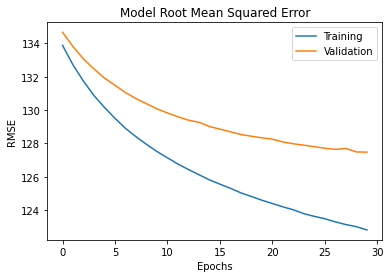

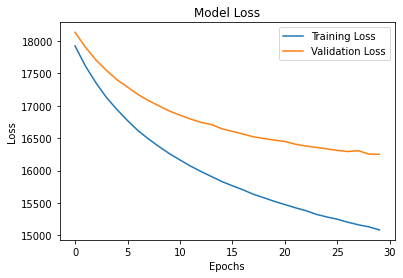

In [31]:
plt.subplot()
plt.title('Model Root Mean Squared Error')
plt.plot([val for val in hisotry.history['root_mean_squared_error']])
plt.plot([val for val in hisotry.history['val_root_mean_squared_error']])
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'])
plt.show()

plt.title('Model Loss')
plt.plot(hisotry.history['loss'])
plt.plot(hisotry.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss','Validation Loss'])
plt.show()